# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

wine = pd.read_csv('wine_quality_red.tsv.gz', sep = '\t')

wine.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

The dataset I chose to focus on for this project is the Wine Quality dataset. There are no null values so I do not need to drop any rows in the dataset

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE

wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Wine Quality Columns:

Fixed Acidity - The fixed acidity variable represents the sum of the organic acids that are within the wine

Volatile Acidity - The volatile acidity variable represents the amount of acids that were produced during the aging and/or fermentation process

Citric Acid - The citric acid variable represents the amount of citric acid within the wine

Residual Sugar - The residual sugar variable represents the amount of residual sugar in the wine

Cholorides - The cholorides variable represents the amount of cholorides found within the wine

Free Sulfur Dioxide - The free sulfur dioxide variable represents the amount of free sulfur dioxide found within the wine

Total Sulfur Dioxide - The total sulfur dioxide variable represents the total amount of sulfur dioxide found within the wine

Density - The density variable represents how dense the wine is

pH - The pH variable represents the pH of the wine

Sulphates - The sulphates variable represents the amount of sulphates in the wine

Alcohol - The alcohol variable represents the alcohol content (ABV) of the wine

Target - The target variable for this dataset is the quality of the wine. This is out of a scale of 10 and a predictive model will use the features above to predict the wine quality based off of the values.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

<function matplotlib.pyplot.show(close=None, block=None)>

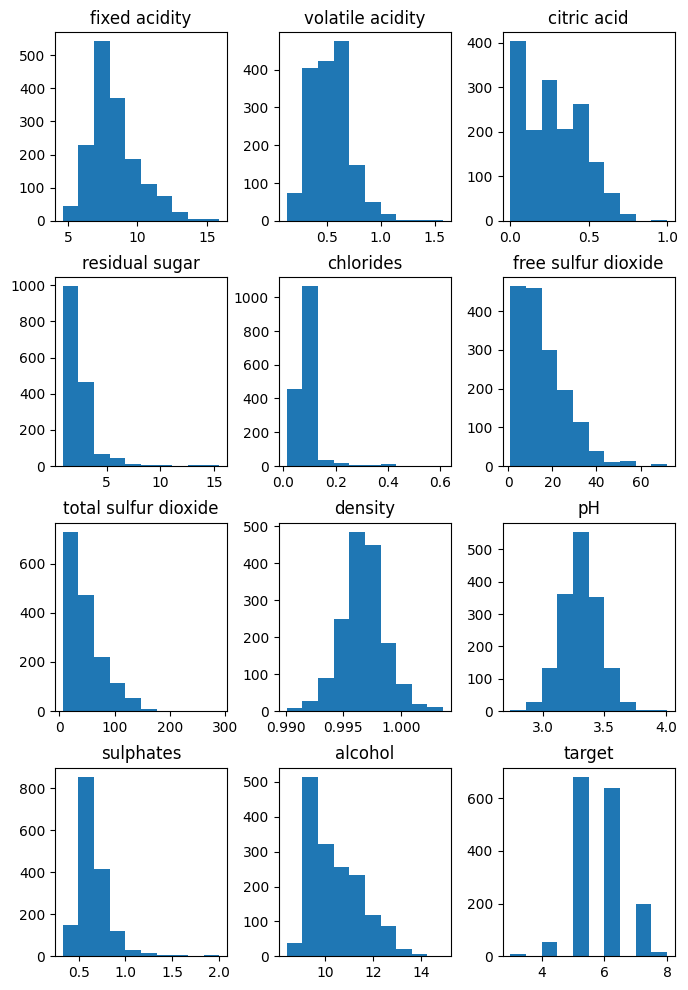

In [5]:
# YOUR CODE HERE
wine.hist(figsize = (8, 12), grid = False)
plt.show

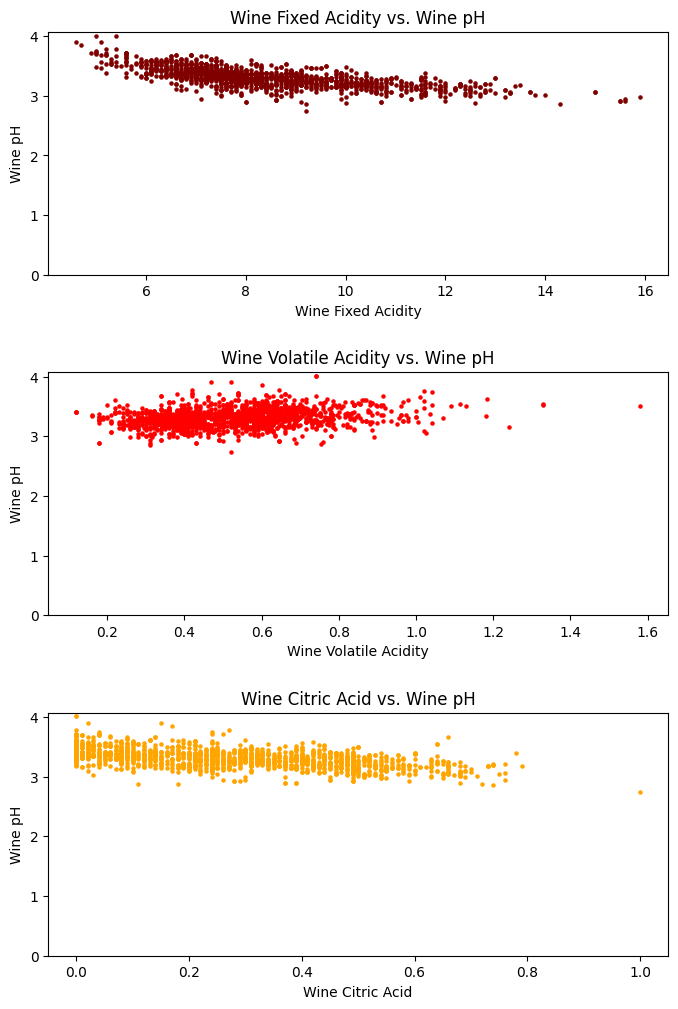

In [6]:
plt.figure(figsize = (8, 12))

plt.subplot(3, 1, 1)
plt.scatter(wine['fixed acidity'], wine['pH'], color = 'maroon', s = 5)
plt.ylim(0)
plt.title('Wine Fixed Acidity vs. Wine pH')
plt.xlabel('Wine Fixed Acidity')
plt.ylabel('Wine pH')

plt.subplot(3, 1, 2)
plt.scatter(wine['volatile acidity'], wine['pH'], color = 'red', s = 5)
plt.ylim(0)
plt.title('Wine Volatile Acidity vs. Wine pH')
plt.xlabel('Wine Volatile Acidity')
plt.ylabel('Wine pH')

plt.subplot(3, 1, 3)
plt.scatter(wine['citric acid'], wine['pH'], color = 'orange', s = 5)
plt.ylim(0)
plt.title('Wine Citric Acid vs. Wine pH')
plt.xlabel('Wine Citric Acid')
plt.ylabel('Wine pH')

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

In [7]:
wine['target'].value_counts().sort_index()

target
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

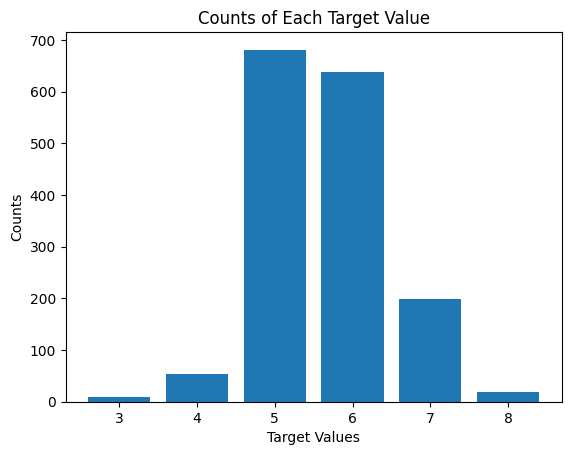

In [8]:
plt.bar([3, 4, 5, 6, 7, 8], wine['target'].value_counts().sort_index())
plt.title('Counts of Each Target Value')
plt.xlabel('Target Values')
plt.ylabel('Counts')

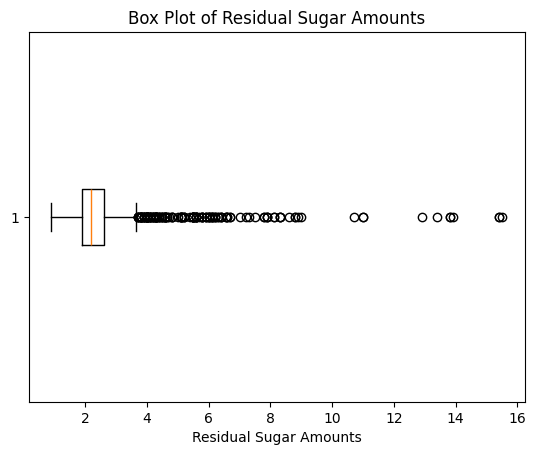

In [9]:
plt.boxplot(wine['residual sugar'], orientation = 'horizontal')
plt.xlabel('Residual Sugar Amounts')
plt.title('Box Plot of Residual Sugar Amounts')
plt.show()

The three charts I believe are interesting are the chloride histogram, Fixed Acidity vs. pH scatter plot and the box plot of Residual Sugars. I have graphed each of them again below and will then explain why I think they are noteworthy under the graph.

Text(0.5, 1.0, 'Chlorides Histogram')

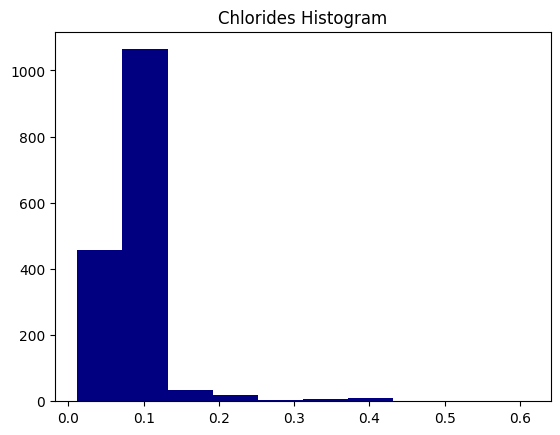

In [10]:
wine['chlorides'].hist(color = 'navy', grid = False)
plt.title('Chlorides Histogram')

The first graph I found interesting is the Chlorides histogram. When looking at this graph, you can see there is a very large left skew with some outliers to the right. Having the skew means that it may lead to bias in certain models and makes certain summary statistics biased as well. In the future, we may want to normalize this metric so it is less likely to bias certain regression models.

Text(0, 0.5, 'Wine pH')

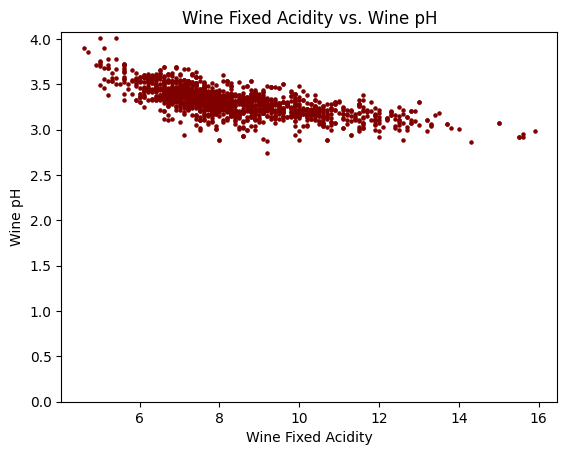

In [11]:
plt.scatter(wine['fixed acidity'], wine['pH'], color = 'maroon', s = 5)
plt.ylim(0)
plt.title('Wine Fixed Acidity vs. Wine pH')
plt.xlabel('Wine Fixed Acidity')
plt.ylabel('Wine pH')

The next graph I found interesting was the Fixed Acidity vs. pH scatter plot. I graphed all three acidity features with the pH and this is the only one that had a visible negative correlation. I am surprised that only the fixed acidity has an effect on the pH as I would assume all three acid features would have some effect. It also seems a lot of the data has a fixed acidity in between the range of 6-10 so we may have some bias issues as well with this feature.

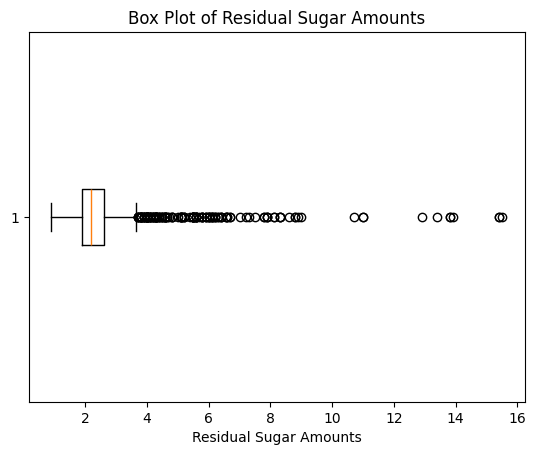

In [12]:
plt.boxplot(wine['residual sugar'], orientation = 'horizontal')
plt.xlabel('Residual Sugar Amounts')
plt.title('Box Plot of Residual Sugar Amounts')
plt.show()

The last chart I found interesting was the residual sugars box plot. I chose to make this graph as I noticed in the initial histograms I graphed that the residual sugars histogram contained a lot of outliers. A box plot helps visualize how many outliers a feature may have, and it seems like this feature contains a decent amount. A lot of the outliers are right near the upper boundary of  the boxplot. However, this boxplot does show that this feature is also heavily skewed like chlorides, so it will cause some bias in models as well. As stated above, in the future we may want to normalize this feature to try to lower the bias of this feature in models and summary statistics.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [13]:
# YOUR CODE HERE

corr_matrix = wine.corr()

corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


For this question, I used the Seaborn Heatmap function to help visualize the correlation matrix. I learned about this function during my bachelors degree and find it to very helpful to compare the correlations. This matrix shows that there are three columns that are highly positively correlated and there is one set of columns that is highly negatively correlated. The three columns that have high positive correlations are Fixed Acidity and Citric Acid, Fixed Acidity and Density, and Free Sulfur Dioxide and Total Sulfur Dioxide. The one set of columns that have a high negative correlation are Fixed Acidity and pH. Out of these four, ph and Fixed Acidity have the highest correlation, but all four all have very close correlation numbers.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [14]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor

The three regression models I have chosen are Linear Regression, Ridge Regression and a Decision Tree Regression model. The documentation for each is below.

Linear Regression Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression  
Linear Regression Description: https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/

Ridge Regression Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge  
Ridge Regression Description: https://www.geeksforgeeks.org/machine-learning/what-is-ridge-regression/

Decision Tree Regression Model Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor  
Decision Tree Regression Model Description: https://www.geeksforgeeks.org/machine-learning/decision-tree/ 

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

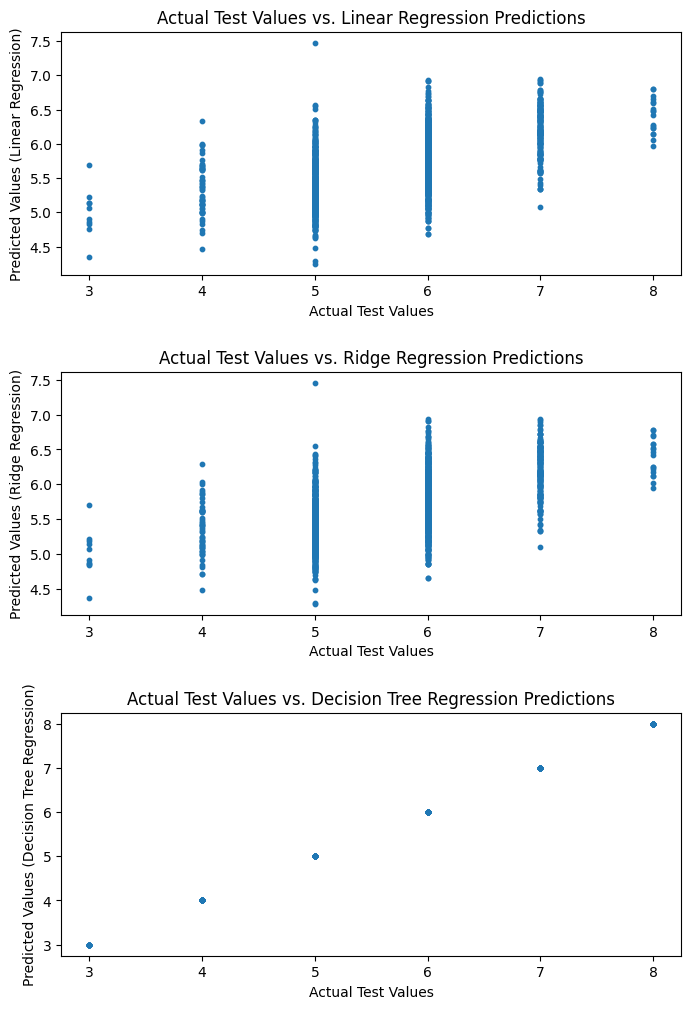

In [31]:
# YOUR CODE HERE

lr_model = LinearRegression()
rr_model = Ridge()
reg_tree = DecisionTreeRegressor()

X = wine.drop(columns = 'target')
Y = wine['target']

lr_model.fit(X, Y)
rr_model.fit(X, Y)
reg_tree.fit(X, Y)

preds_lr = lr_model.predict(X)
preds_rr = rr_model.predict(X)
preds_rt = reg_tree.predict(X)

lr_residuals_l1 = [abs(Y[i] - preds_lr[i]) for i in range(len(Y))]
lr_residuals_l2 = [(Y[i] - preds_lr[i])**2 for i in range(len(Y))]

rr_residuals_l1 = [abs(Y[i] - preds_rr[i]) for i in range(len(Y))]
rr_residuals_l2 = [(Y[i] - preds_rr[i])**2 for i in range(len(Y))]

rt_residuals_l1 = [abs(Y[i] - preds_rt[i]) for i in range(len(Y))]
rt_residuals_l2 = [(Y[i] - preds_rt[i])**2 for i in range(len(Y))]

l1_lr = sum(lr_residuals_l1)/len(Y)
l2_lr = sum(lr_residuals_l2)/len(Y)

l1_rr = sum(rr_residuals_l1)/len(Y)
l2_rr = sum(rr_residuals_l2)/len(Y)

l1_rt = sum(rt_residuals_l1)/len(Y)
l2_rt = sum(rt_residuals_l2)/len(Y)

plt.figure(figsize = (8,12))

plt.subplot(3, 1, 1)
plt.scatter(Y, preds_lr, s = 10)
plt.title('Actual Test Values vs. Linear Regression Predictions')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values (Linear Regression)')

plt.subplot(3, 1, 2)
plt.scatter(Y, preds_rr, s = 10)
plt.title('Actual Test Values vs. Ridge Regression Predictions')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values (Ridge Regression)')

plt.subplot(3, 1, 3)
plt.scatter(Y, preds_rt, s = 10)
plt.title('Actual Test Values vs. Decision Tree Regression Predictions')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values (Decision Tree Regression)')

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

In [ ]:

print(f'The L1 Loss for the Linear Regression model is {l1_lr :.2f} and the L2 Loss for the Linear Regression model is {l2_lr :.2f}')
print(f'The L1 Loss for the Ridge Regression model is {l1_rr :.2f} and the L2 Loss for the Ridge Regression model is {l2_rr :.2f}')
print(f'The L1 Loss for the Decision Tree Regression model is {l1_rt :.2f} and the L2 Loss for the Decision Tree model is {l2_rt :.2f}')

The L1 Loss for the Linear Regression model is 0.50 and the L2 Loss for the Linear Regression model is 0.417
The L1 Loss for the Ridge Regression model is 0.50 and the L2 Loss for the Ridge Regression model is 0.417
The L1 Loss for the Decision Tree Regression model is 0.00 and the L2 Loss for the Decision Tree model is 0.00


In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, preds_rt)
mse

0.0

I have graphed the actual vs. predicted for each regression model above. What is interesting is how fewer points there are on the regression tree model compared to the other two. This could be due to the predictions and actual being the same so there are the same amount of points they are just stacke on each other. I have also noticed that the predictions are floating point numbers while the actual values are integers for linear regression and ridge regression.  

I also have found the average L1 and L2 losses for each model and they are printed above! Based on these loss models, the Decision Tree model is the best and it is most likely due to overfitting since it has access to all of the data. Otherwise, the L1 and L2 loss for the linear and ridge regression models are very similar and one isn't truly better than the other. I would be curious to see if these values would change if I split the data by training and test data. 

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [43]:
# YOUR CODE HERE

from sklearn.model_selection import cross_validate

lr_cv = cross_validate(lr_model, X, Y, scoring = 'neg_mean_squared_error')
rr_cv = cross_validate(rr_model, X, Y, scoring = 'neg_mean_squared_error')
dt_cv = cross_validate(reg_tree, X, Y, scoring = 'neg_mean_squared_error')

print(f'The average L2 loss for the Linear Regression Cross Validation model is {-lr_cv['test_score'].mean():.2f}.')
print(f'The average L2 loss for the Ridge Regression Cross Validation model is {-rr_cv['test_score'].mean():.2f}.')
print(f'The average L2 loss for the Decision Tree Cross Validation model is {-dt_cv['test_score'].mean():.2f}.')

The average L2 loss for the Linear Regression Cross Validation model is 0.44.
The average L2 loss for the Ridge Regression Cross Validation model is 0.44.
The average L2 loss for the Decision Tree Cross Validation model is 0.84.


To start, I looked into the cross_validate model and how to have it compute L2 Loss so I could compare it to the original model's loss score. To have it compute average L2 loss, I set the scoring parameter to 'neg_mean_squared_error' and then would negate it so I would be able to have a positive score. I have linked the documentation for all the string options for scoring from the scikit learn website below.

Link to Sci-Kit Learn Documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-string-names

When looking at the average L2 losses for the cross validation models, the scores for the linear regression and ridge regression models are very similar to the original models. The original models have L2 losses of 0.42 while the cross validation ones have L2 losses of 0.44. However, the decision tree validation model has a much steeper difference. The average L2 loss for the original tree model is 0, but the cross validation model has an average L2 loss of 0.84. All the differences between the scores is most likely due to overfitting in the original models. It is important to note that the difference between the L2 losses for the linear and ridge regression models is much smaller than the decision tree's difference. Due to the small differences I would probably chose betweeen the linear regression and ridge regression when building the final model since it still shows these models are better than the decision tree.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_pipeline = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rr_pipeline = make_pipeline(StandardScaler(), PCA(), Ridge())
dt_pipeline = make_pipeline(StandardScaler(), PCA(), DecisionTreeRegressor())

lr_pipeline.fit(X, Y)
rr_pipeline.fit(X, Y)
dt_pipeline.fit(X, Y)

lrp_preds = lr_pipeline.predict(X)
rrp_preds = rr_pipeline.predict(X)
dtp_preds = dt_pipeline.predict(X)

lrp_residuals = [(Y[i] - lrp_preds[i])**2 for i in range(len(Y))]
rrp_residuals = [(Y[i] - rrp_preds[i])**2 for i in range(len(Y))]
dtp_residuals = [(Y[i] - dtp_preds[i])**2 for i in range(len(Y))]

lrp_l2 = sum(lrp_residuals)/len(Y)
rrp_l2 = sum(rrp_residuals)/len(Y)
dtp_l2 = sum(dtp_residuals)/len(Y)

print(f'The average L2 Loss for Linear Regression with Standardized Data is {lrp_l2:.2f}.')
print(f'The average L2 Loss for Ridge Regression with Standardized Data is {rrp_l2:.2f}.')
print(f'The average L2 Loss for a Decision Tree with Standardized Data is {dtp_l2:.2f}.')

The average L2 Loss for Linear Regression with Standardized Data is 0.417.
The average L2 Loss for Ridge Regression with Standardized Data is 0.417.
The average L2 Loss for a Decision Tree with Standardized Data is 0.00.


When looking at the average L2 loss for each of these new models, there is very little difference between them meaning the models performed the same even with standardization and principal components analysis. When comparing the the prediction values of each pipeline to the original model's predictions, the only one that has slight differences is the ridge regression model. However it is important to note that these are very miniscule differences so both models perform the same pretty much. Otherwise, the other two models have the same predictions leading to the same average L2 losses. This means that if we wanted, we could use either form of the model to predict if we wanted to move forward with them in the future. 

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [19]:
# YOUR CODE HERE

Instead of randomly training 1000 models at random depths and wasting computational resources, I would use cross validation and parameter tuning to help determine which combination of parameters works the best as it would take less computational resources and time.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [20]:
# YOUR CODE HERE

When looking at the models I built for this project, I was stuck between choosing the standardized linear regression model or the standardized ridge regression model. The reason I narrowed it down to these two was due to the criteria I was looking for. The criteria I was basing my choice is the average L2 loss score as well as not being super overfitted. When looking at the decision tree model, the standardized version did have the best score but that was due to overfitting of the model. This would mean that if I applied it to a new set of data, it wouldn't be as accurate since it is fitted specifically to the training data. However, the other two models are not as severly overfitted as the decision tree model so they would have a better accuracy with new data. To continue, the next piece of criteria I began to look into is the breakdown of how the models work overall and dealing with correlations between variables. In this dataset, there are a couple of variables that have higher correlations than others so that can have an affect on the overall performance of the model. After looking into each model and how it operates, I ended up choosing the standardized Ridge Regression model. This is due to the fact that this model is designed to help deal with high correlations amongst input variables. However, I would like to note that if I would continue with building this model, I would first test it with split data to see how it performs compared to when it uses all of the data to train. Furthermore, I would begin parameter tuning as the article I read was explaining how perfecting the parameters is key to make a good ridge regression model. If I was to not perform any data splitting or parameter tuning, I feel like I could use either the linear regression or ridge regression due to them having very similar performances with very miniscule differences.